In [4]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/AAPL?period1=1477958400&period2=1634256000&interval=1d&events=history&includeAdjustedClose=true')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-11-01,28.365000,28.442499,27.632500,27.872499,25.875893,175303200
1,2016-11-02,27.850000,28.087500,27.807501,27.897499,25.899105,113326800
2,2016-11-03,27.745001,27.865000,27.387501,27.457500,25.621500,107730400
3,2016-11-04,27.132500,27.562500,27.027500,27.209999,25.390547,123348000
4,2016-11-07,27.520000,27.627501,27.365000,27.602501,25.756805,130240000


In [8]:
data = df.filter(['Close']).values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)


In [9]:
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]


In [10]:
def create_dataset(dataset, time_steps=1):
    data_x, data_y = [], []
    for i in range(len(dataset) - time_steps - 1):
        data_x.append(dataset[i:(i + time_steps), 0])
        data_y.append(dataset[i + time_steps, 0])
    return np.array(data_x), np.array(data_y)
time_steps = 60
train_x, train_y = create_dataset(train_data, time_steps)
test_x, test_y = create_dataset(test_data, time_steps)


In [11]:
train_x = np.reshape(train_x, (train_x.shape[0], train_x.shape[1], 1))
test_x = np.reshape(test_x, (test_x.shape[0], test_x.shape[1], 1))


In [12]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_steps, 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))


In [13]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_x, train_y, batch_size=32, epochs=100)


Epoch 1/100
30/30 [==============================] - 9s 80ms/step - loss: 0.0140
Epoch 2/100
30/30 [==============================] - 3s 100ms/step - loss: 8.1945e-04
Epoch 3/100
30/30 [==============================] - 3s 93ms/step - loss: 5.9381e-04
Epoch 4/100
30/30 [==============================] - 3s 101ms/step - loss: 5.9072e-04
Epoch 5/100
30/30 [==============================] - 3s 92ms/step - loss: 5.4486e-04
Epoch 6/100
30/30 [==============================] - 3s 94ms/step - loss: 5.1429e-04
Epoch 7/100
30/30 [==============================] - 3s 87ms/step - loss: 5.2860e-04
Epoch 8/100
30/30 [==============================] - 2s 70ms/step - loss: 4.9070e-04
Epoch 9/100
30/30 [==============================] - 3s 92ms/step - loss: 5.2901e-04
Epoch 10/100
30/30 [==============================] - 3s 96ms/step - loss: 4.9357e-04
Epoch 11/100
30/30 [==============================] - 3s 105ms/step - loss: 5.2002e-04
Epoch 12/100
30/30 [==============================] - 3s 96ms/st

6/6 [==============================] - 0s 33ms/step


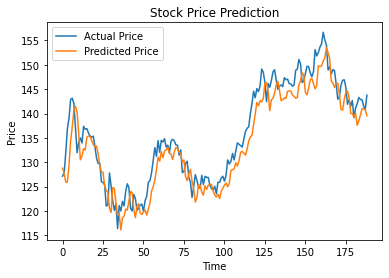

In [15]:
predictions = model.predict(test_x)
predictions = scaler.inverse_transform(predictions)
plt.plot(df['Close'].values[train_size + time_steps + 1:], label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()